<a href="https://colab.research.google.com/github/ganesh10-code/ML_lab/blob/main/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

principle Components:
 [[-2.67176615 -1.55493465]
 [-0.95785711  7.75050938]
 [-1.98301611 -0.93388034]
 ...
 [-2.00128265 -0.95710061]
 [-1.93265945 -0.88948095]
 [-2.58756522 -1.40031725]]
Explained variance ratio:  [0.08057636 0.05213377]


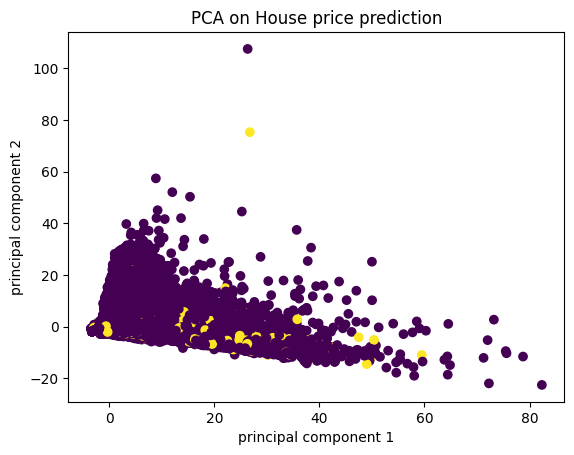

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/kaggle/input/ganesh-datasets/house_price_train.csv')
target='SalePrice'
X=data[data.select_dtypes(include=['number']).columns].drop(columns=[target]).fillna(0)
Y=data[target]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

print("principle Components:\n",X_pca)
print("Explained variance ratio: ",pca.explained_variance_ratio_)

plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='viridis')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.title('PCA on Customer satisfaction prediction')
plt.show()


Linear Discriminant: 
      LDA Component
0        -1.023075
1         1.219002
2        -0.880422
3         1.196167
4        -1.072917
..             ...
886       0.089826
887       1.481763
888       0.053548
889       1.331495
890      -1.182840

[891 rows x 1 columns]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


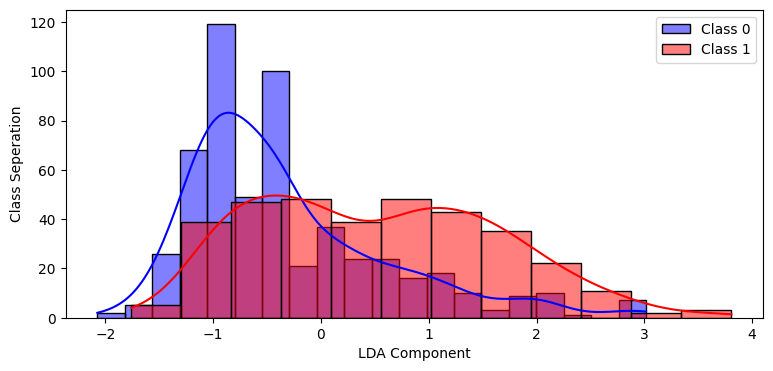

In [ ]:
#LDA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/kaggle/input/ganesh-datasets/titanic_train.csv')
target='Survived'
X=data[data.select_dtypes(include=['number']).columns].drop(columns=[target]).fillna(0)
Y=data[target]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

lda=LinearDiscriminantAnalysis(n_components=1)
X_lda=lda.fit_transform(X_scaled,Y)
X_lda = pd.DataFrame(X_lda,index=Y.index, columns=['LDA Component'])
X_lda=X_lda.replace([np.inf, -np.inf], np.nan).dropna()

print("Linear Discriminant: \n",X_lda)

plt.figure(figsize=(9,4))
sns.histplot(X_lda.loc[Y==0,'LDA Component'],label='Class 0',kde=True,color='blue')
sns.histplot(X_lda.loc[Y==1,'LDA Component'],label='Class 1',kde=True,color='red')
plt.xlabel('LDA Component')
plt.ylabel('Class Seperation')
plt.legend()
plt.show()



